In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

**base_model--CNN**

In [3]:
# Define your CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\THINKPAD\PycharmProjects\cv_lab_project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**RESNET_50**

In [4]:
# Load the ResNet50 model with pre-trained weights, excluding the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model_resnet50.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

for layer in base_model_resnet50.layers:
    layer.trainable = False


**VVG16**

In [5]:
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model_vgg16.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions_vgg16 = Dense(3, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16)

for layer in base_model_vgg16.layers:
    layer.trainable = False


cnn

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet-50

In [7]:
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vvg_16

In [8]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Preprocessing**

In [9]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [10]:

testing_data_generator = ImageDataGenerator(
    rescale=1.0/255
)


In [11]:
training_dataset = training_data_generator.flow_from_directory(
    'Dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 3 classes.


In [12]:
testing_dataset = testing_data_generator.flow_from_directory(
    'Dataset/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 582 images belonging to 3 classes.


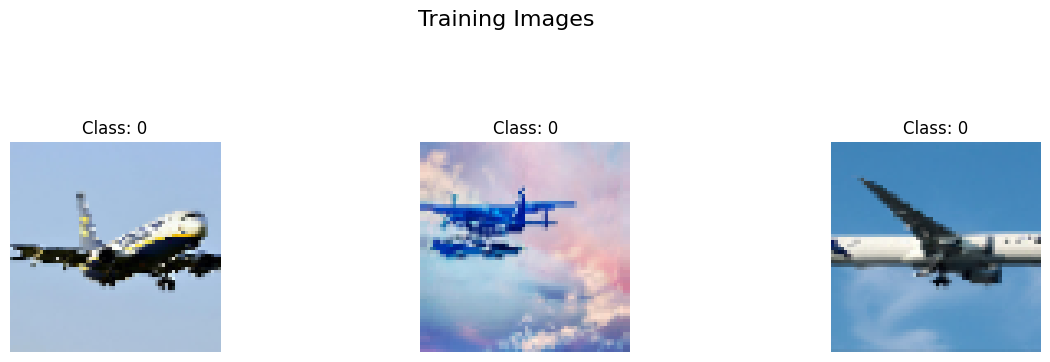

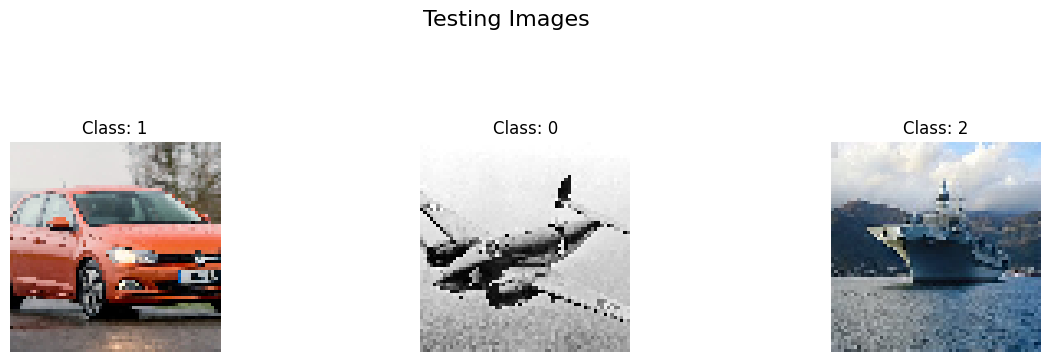

In [13]:
def display_images(dataset_generator, num_images, dataset_type):
    # Get a batch of images from the generator
    images, labels = next(dataset_generator)

    # Plot the images
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"{dataset_type} Images", fontsize=16, y=1.1)
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i].argmax()}")  # Assuming one-hot encoding for labels
        plt.axis("off")
    plt.show()

# Display training images
display_images(training_dataset, 3, 'Training')

# Display testing images
display_images(testing_dataset, 3, 'Testing')


**CNN**

In [14]:
history = model.fit(
    training_dataset,
    epochs=10,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/10


c:\Users\THINKPAD\PycharmProjects\cv_lab_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 411ms/step - accuracy: 0.5346 - loss: 0.9308 - val_accuracy: 0.6993 - val_loss: 0.7543
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 457ms/step - accuracy: 0.7766 - loss: 0.5639 - val_accuracy: 0.7234 - val_loss: 0.6482
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.8001 - loss: 0.4690 - val_accuracy: 0.7079 - val_loss: 0.7061
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 530ms/step - accuracy: 0.8396 - loss: 0.4296 - val_accuracy: 0.8333 - val_loss: 0.4374
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 532ms/step - accuracy: 0.8790 - loss: 0.3211 - val_accuracy: 0.8265 - val_loss: 0.4343
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.8855 - loss: 0.3038 - val_accuracy: 0.8213 - val_loss: 0.4682
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.8968 - loss: 0.2748 - val_accuracy: 0.8574 - val_loss: 0.3601
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.9139 - loss: 0.2222 - val_accuracy: 0.888

**RESNET50**

In [15]:
# Train the resnet50model
history_resnet50 = model_resnet50.fit(
    training_dataset,
    epochs=10,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 669ms/step - accuracy: 0.4828 - loss: 0.9994 - val_accuracy: 0.5378 - val_loss: 0.9033
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 61s 621ms/step - accuracy: 0.6409 - loss: 0.7973 - val_accuracy: 0.6856 - val_loss: 0.6736
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.6657 - loss: 0.7443 - val_accuracy: 0.7131 - val_loss: 0.6587
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 61s 622ms/step - accuracy: 0.6964 - loss: 0.6945 - val_accuracy: 0.7199 - val_loss: 0.6320
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 650ms/step - accuracy: 0.7178 - loss: 0.6682 - val_accuracy: 0.5309 - val_loss: 0.9805
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 62s 627ms/step - accuracy: 0.7112 - loss: 0.6806 - val_accuracy: 0.7131 - val_loss: 0.6405
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - accuracy: 0.7312 - loss: 0.6515 - val_accuracy: 0.7268 - val_loss: 0.6363
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.7398 - loss: 0.6298 - val_accu

*VVG16*

In [16]:
# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    training_dataset,
    epochs=10,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 876ms/step - accuracy: 0.7356 - loss: 0.6143 - val_accuracy: 0.9192 - val_loss: 0.2045
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 83s 835ms/step - accuracy: 0.9004 - loss: 0.2613 - val_accuracy: 0.9399 - val_loss: 0.1582
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 61s 632ms/step - accuracy: 0.9346 - loss: 0.1761 - val_accuracy: 0.9570 - val_loss: 0.1311
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 92s 957ms/step - accuracy: 0.9364 - loss: 0.1600 - val_accuracy: 0.9399 - val_loss: 0.1419
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 90s 933ms/step - accuracy: 0.9402 - loss: 0.1539 - val_accuracy: 0.9467 - val_loss: 0.1324
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 80s 824ms/step - accuracy: 0.9464 - loss: 0.1491 - val_accuracy: 0.9433 - val_loss: 0.1439
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 666ms/step - accuracy: 0.9560 - loss: 0.1191 - val_accuracy: 0.9261 - val_loss: 0.1613
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 65s 677ms/step - accuracy: 0.9561 - loss: 0.1154 - val_accu

**Comaparing Accuracy**

*CNN*

In [17]:
# Evaluate on training set
loss, accuracy_train = model.evaluate(training_dataset, verbose=0)
print(f"Training Accuracy: {accuracy_train}")

# Evaluate on testing set
loss, accuracy_test = model.evaluate(testing_dataset, verbose=0)
print(f"Test Accuracy: {accuracy_test}")

Training Accuracy: 0.9446666836738586
Test Accuracy: 0.8556700944900513


In [18]:
precision_cnn = precision_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')
recall_cnn = recall_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')
f1_cnn = f1_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')

print(f'CNN Precision: {precision_cnn:.2f}')
print(f'CNN Recall: {recall_cnn:.2f}')
print(f'CNN F1-score: {f1_cnn:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step
CNN Precision: 0.29
CNN Recall: 0.34
CNN F1-score: 0.31


*Resnet_50*

In [19]:

# Evaluate the model
loss, accuracy_train = model_resnet50.evaluate(training_dataset, verbose=0)
print(f"ResNet50 Training Accuracy: {accuracy_train}")

loss, accuracy_test = model_resnet50.evaluate(testing_dataset, verbose=0)
print(f"ResNet50 Test Accuracy: {accuracy_test}")

ResNet50 Training Accuracy: 0.7360000014305115
ResNet50 Test Accuracy: 0.730240523815155


In [20]:
precision_resnet50 = precision_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')
recall_resnet50 = recall_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')
f1_resnet50 = f1_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')

print(f'ResNet50 Precision: {precision_resnet50:.2f}')
print(f'ResNet50 Recall: {recall_resnet50:.2f}')
print(f'ResNet50 F1-score: {f1_resnet50:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step
ResNet50 Precision: 0.29
ResNet50 Recall: 0.32
ResNet50 F1-score: 0.32


*VGG16*

In [21]:
# Evaluate the VGG16 model
loss, accuracy_train_vgg16 = model_vgg16.evaluate(training_dataset, verbose=0)
print(f"VGG16 Training Accuracy: {accuracy_train_vgg16}")

loss, accuracy_test_vgg16 = model_vgg16.evaluate(testing_dataset, verbose=0)
print(f"VGG16 Test Accuracy: {accuracy_test_vgg16}")

VGG16 Training Accuracy: 0.9676666855812073
VGG16 Test Accuracy: 0.9415807723999023


In [22]:
precision_vgg16 = precision_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')
recall_vgg16 = recall_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')
f1_vgg16 = f1_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')

print(f'VGG16 Precision: {precision_vgg16:.2f}')
print(f'VGG16 Recall: {recall_vgg16:.2f}')
print(f'VGG16 F1-score: {f1_vgg16:.2f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 638ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 566ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 535ms/step
VGG16 Precision: 0.34
VGG16 Recall: 0.37
VGG16 F1-score: 0.32


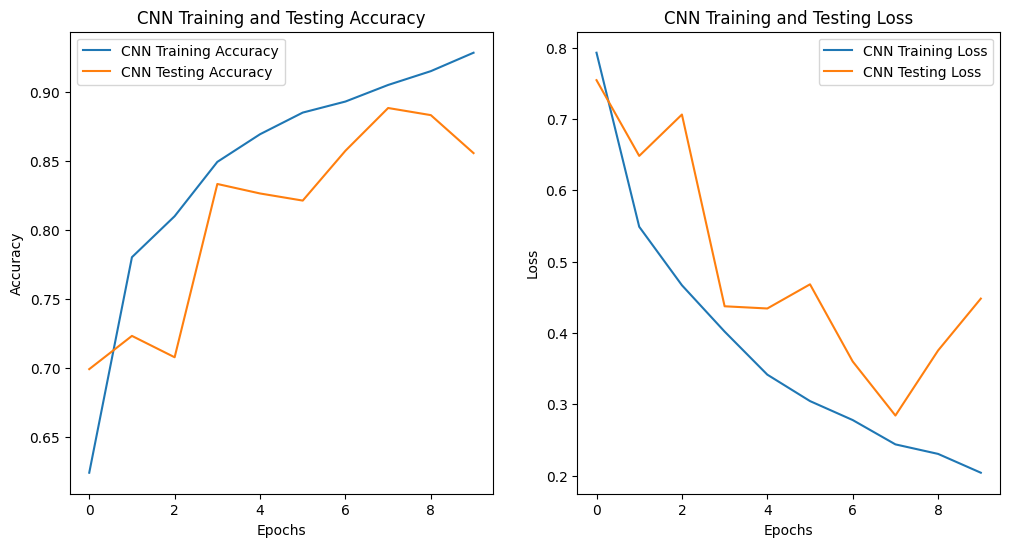

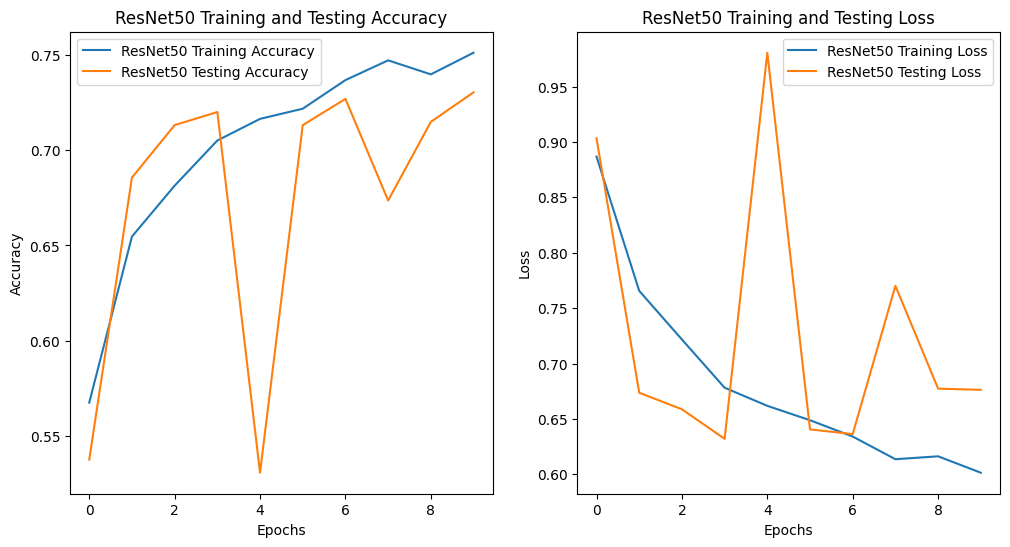

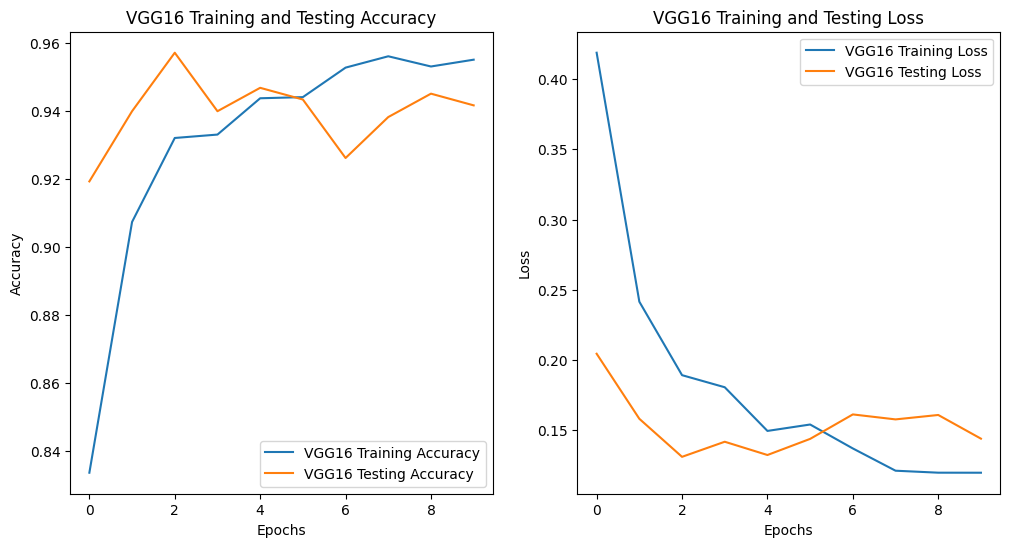

In [23]:
# Plotting CNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Testing Loss')
plt.legend()
plt.show()

# Plotting ResNet50
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet50 Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='ResNet50 Training Loss')
plt.plot(history_resnet50.history['val_loss'], label='ResNet50 Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 Training and Testing Loss')
plt.legend()
plt.show()

# Plotting VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='VGG16 Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 Training and Testing Loss')
plt.legend()
plt.show()


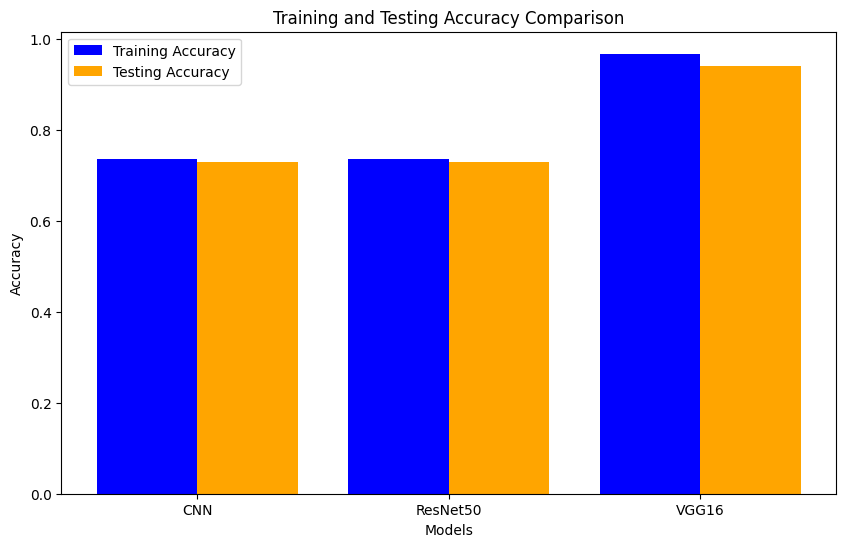

In [24]:

models = ['CNN', 'ResNet50', 'VGG16']
training_accuracies = [accuracy_train, accuracy_train, accuracy_train_vgg16]
testing_accuracies = [accuracy_test, accuracy_test, accuracy_test_vgg16]

# Plot
x = range(len(models))
width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x, training_accuracies, width, label='Training Accuracy', color='blue')
plt.bar([i + width for i in x], testing_accuracies, width, label='Testing Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks([i + width/2 for i in x], models)
plt.legend()

plt.show()


In [38]:
models = ['CNN', 'ResNet50', 'VGG16']
precision_scores = [precision_cnn, precision_resnet50, precision_vgg16]
recall_scores = [recall_cnn, recall_resnet50, recall_vgg16]
f1_scores = [f1_cnn, f1_resnet50, f1_vgg16]

# Plot
x = range(len(models))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x, precision_scores, width, label='Precision', color='blue')
plt.bar([i + width for i in x], recall_scores, width, label='Recall', color='orange')
plt.bar([i + 2*width for i in x], f1_scores, width, label='F1-score', color='green')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks([i + width for i in x], models)
plt.legend()

plt.show()


In [47]:
img_path = r'Dataset\test\cars\cars17.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the ResNet50 model
prediction_cnn = model.predict(img_array)
predicted_class_resnet50 = np.argmax(prediction_cnn)
class_labels = ["airplanes", "cars", "ships"]
predicted_label_resnet50 = class_labels[predicted_class_resnet50]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_resnet50)  # Add title with predicted label
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [46]:
img_path = r'Dataset\test\cars\cars17.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the ResNet50 model
prediction_resnet50 = model_resnet50.predict(img_array)
predicted_class_resnet50 = np.argmax(prediction_resnet50)
class_labels = ["airplanes", "cars", "ships"]
predicted_label_resnet50 = class_labels[predicted_class_resnet50]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_resnet50)  # Add title with predicted label
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [42]:
img_path = r'Dataset\test\cars\cars17.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the VGG16 model
prediction_vgg16 = model_vgg16.predict(img_array)
predicted_class_vgg16 = np.argmax(prediction_vgg16)
class_labels = ["airplanes", "cars", "ships"]
predicted_label_vgg16 = class_labels[predicted_class_vgg16]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_vgg16)  # Add title with predicted label
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [44]:
model_resnet50.save("model_resnet50.h5")
model_vgg16.save("model_vgg16.h5")
model.save("model_cnn.h5")